In [3]:
import json
import pathlib
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt


In [4]:
def plot_model_comparisons(
    file_paths,
    *,
    suffix_to_strip: str = "_output.json",  # remove this tail to get the model name
    figsize=(12, 6),
):
    """
    Draw one grouped-bar chart per question that contrasts the answer
    distributions from multiple model-output files.

    Parameters
    ----------
    file_paths : list[str | pathlib.Path]
        Paths of the JSON files, each containing a dict:
        {question: {answer_option: percentage, …}, …}
    suffix_to_strip : str, optional
        Text to remove from each filename (stem) when deriving the
        model name.  Default: "_output.json"
    figsize : tuple[int, int], optional
        Figure size passed to matplotlib.
    """
    # ---------- Load all files ----------
    model_data = {}
    for fp in file_paths:
        fp = pathlib.Path(fp)
        with fp.open(encoding="utf-8") as f:
            data = json.load(f)

        model_name = fp.stem
        if suffix_to_strip and model_name.endswith(suffix_to_strip.removesuffix(".json")):
            model_name = model_name[: -len(suffix_to_strip.removesuffix(".json"))]

        model_data[model_name] = data

    if not model_data:
        raise ValueError("No data was loaded. Check file paths.")

    # ---------- Collect full set of questions ----------
    questions = {q for d in model_data.values() for q in d}

    # ---------- Plot one chart per question ----------
    for q in sorted(questions):
        # Union of answer options across models for this question
        answer_opts = {opt for d in model_data.values() if q in d for opt in d[q]}
        answer_opts = sorted(answer_opts)  # stable order

        n_opts = len(answer_opts)
        n_models = len(model_data)
        bar_w = 0.8 / n_models
        x = np.arange(n_opts)

        fig, ax = plt.subplots(figsize=figsize)

        for i, (model, answers) in enumerate(model_data.items()):
            # default 0 if a model lacked a given answer option
            y = [answers.get(q, {}).get(opt, 0) for opt in answer_opts]
            ax.bar(x + i * bar_w, y, bar_w, label=model)

        ax.set_title(q, wrap=True)
        ax.set_ylabel("Percent")
        ax.set_xticks(x + bar_w * (n_models - 1) / 2)
        ax.set_xticklabels(answer_opts, rotation=45, ha="right", wrap=True)
        ax.set_ylim(0, 100)
        ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")

        plt.tight_layout()
        plt.show()

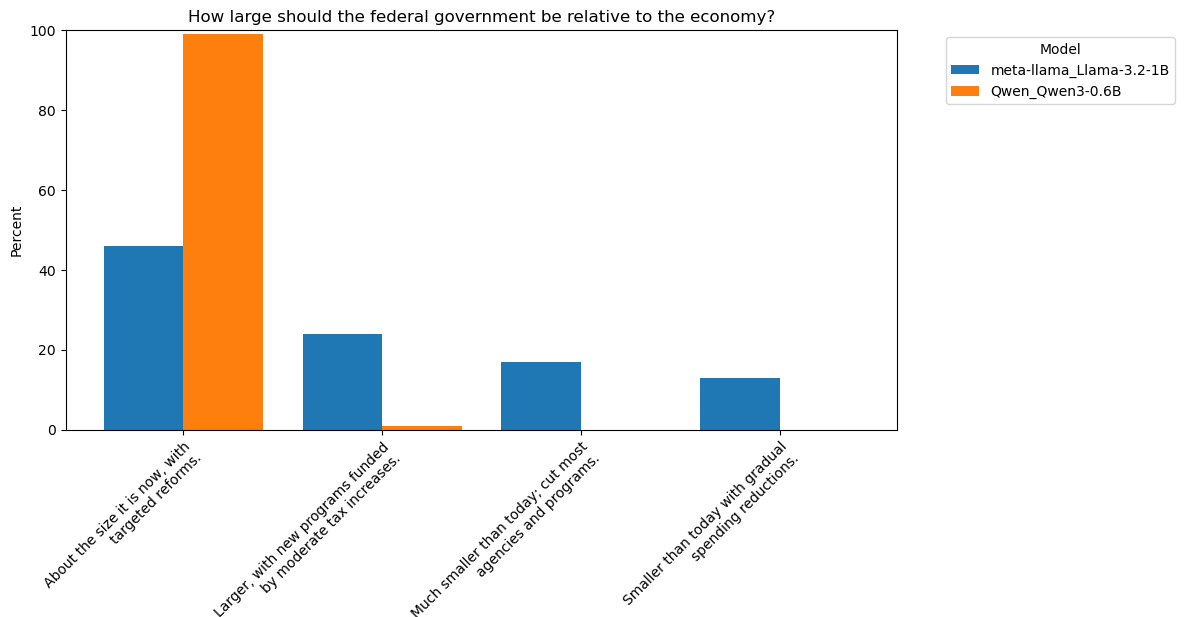

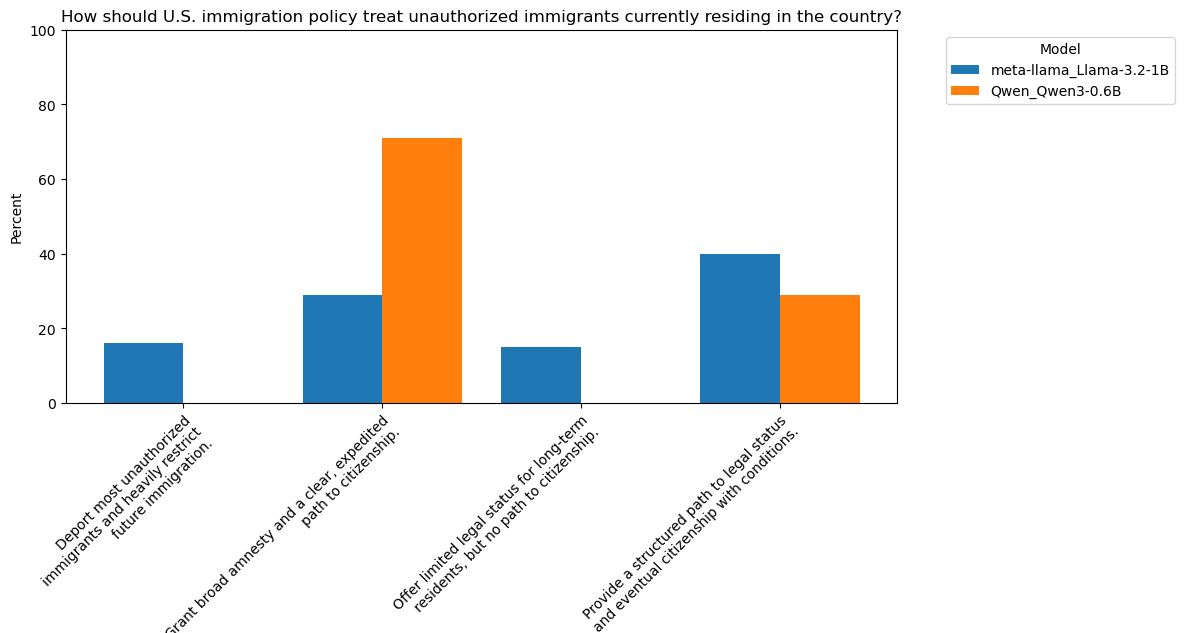

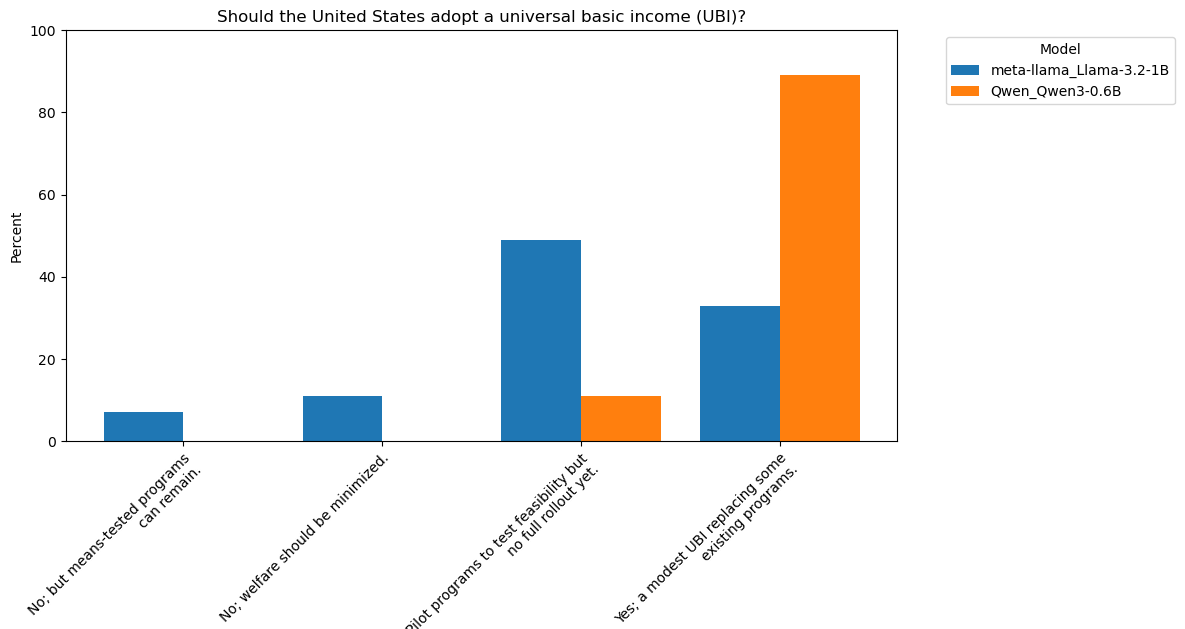

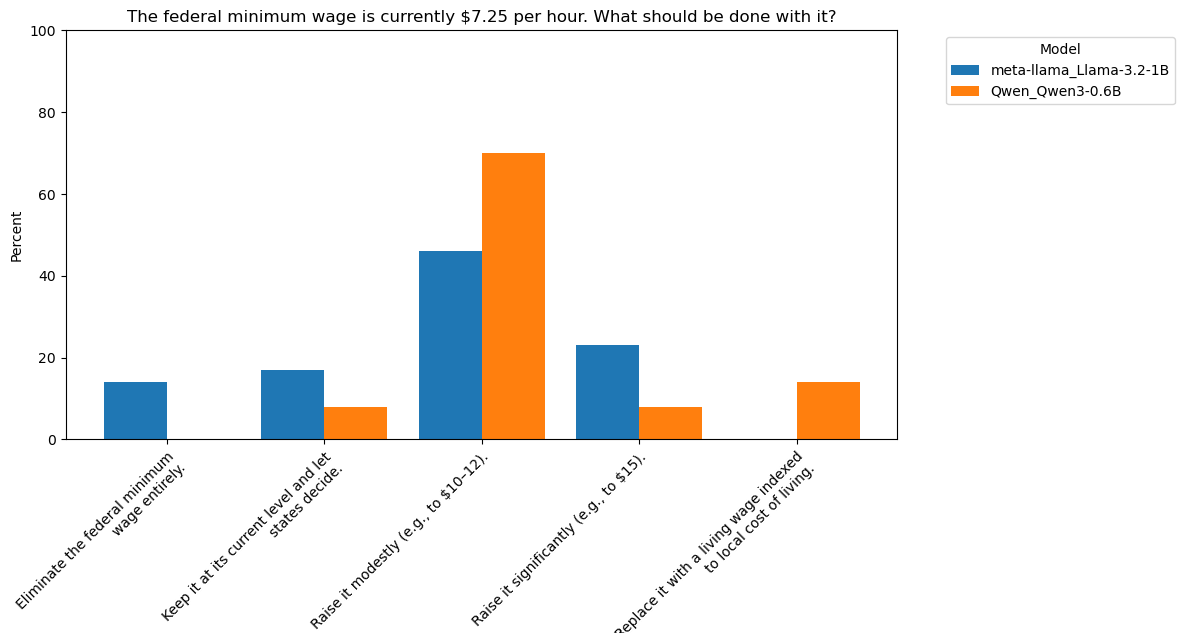

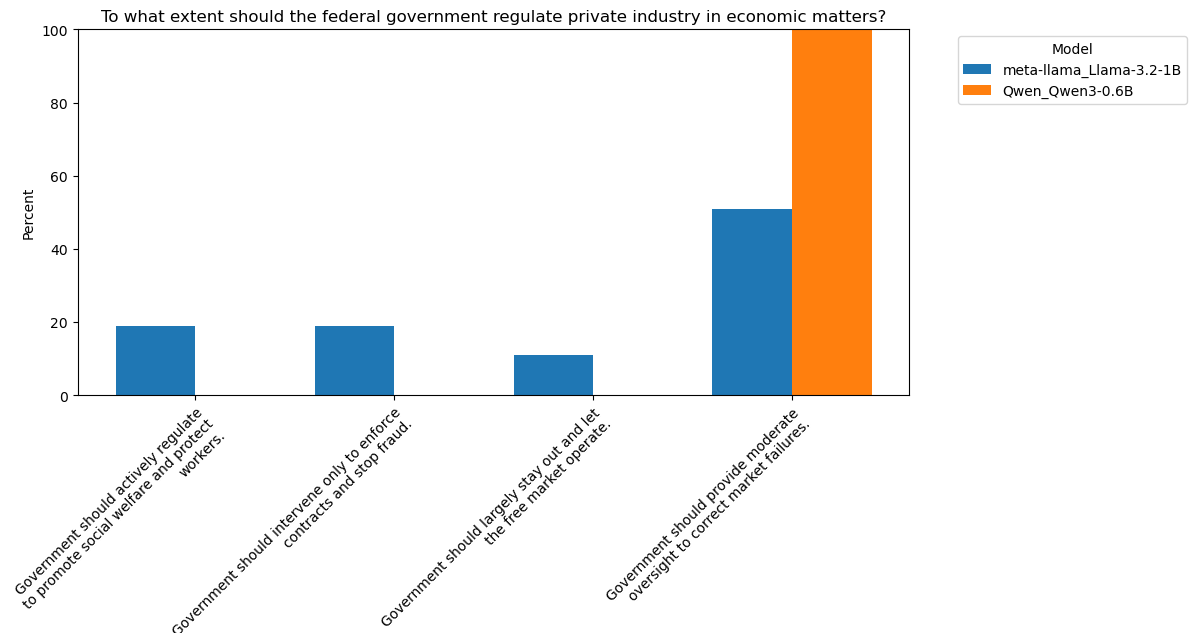

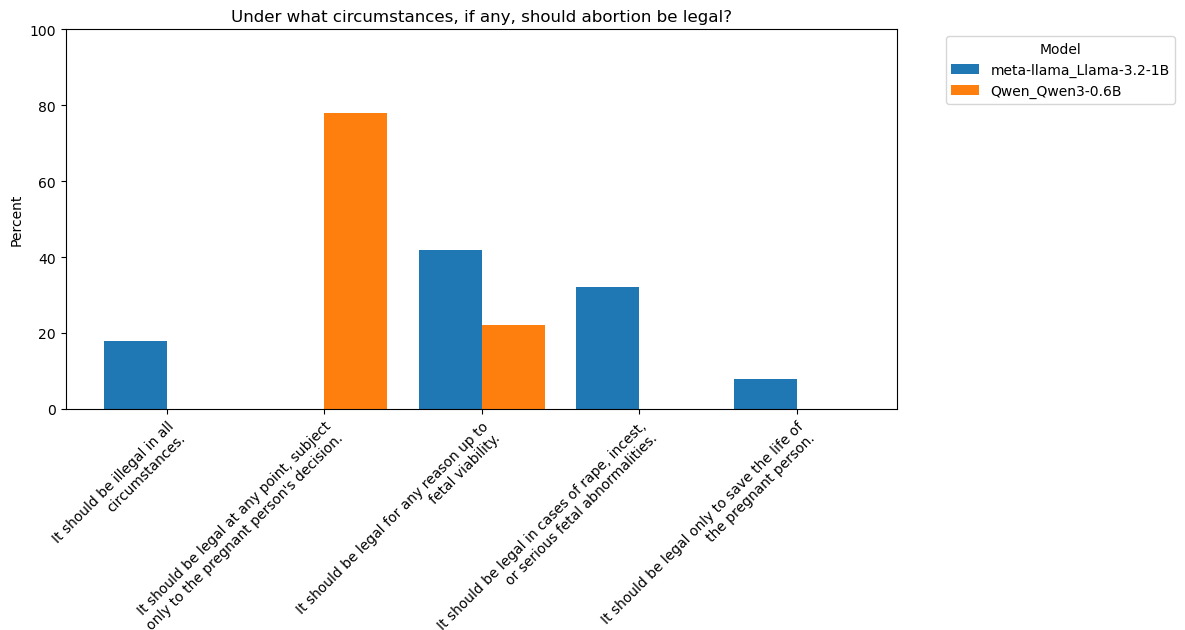

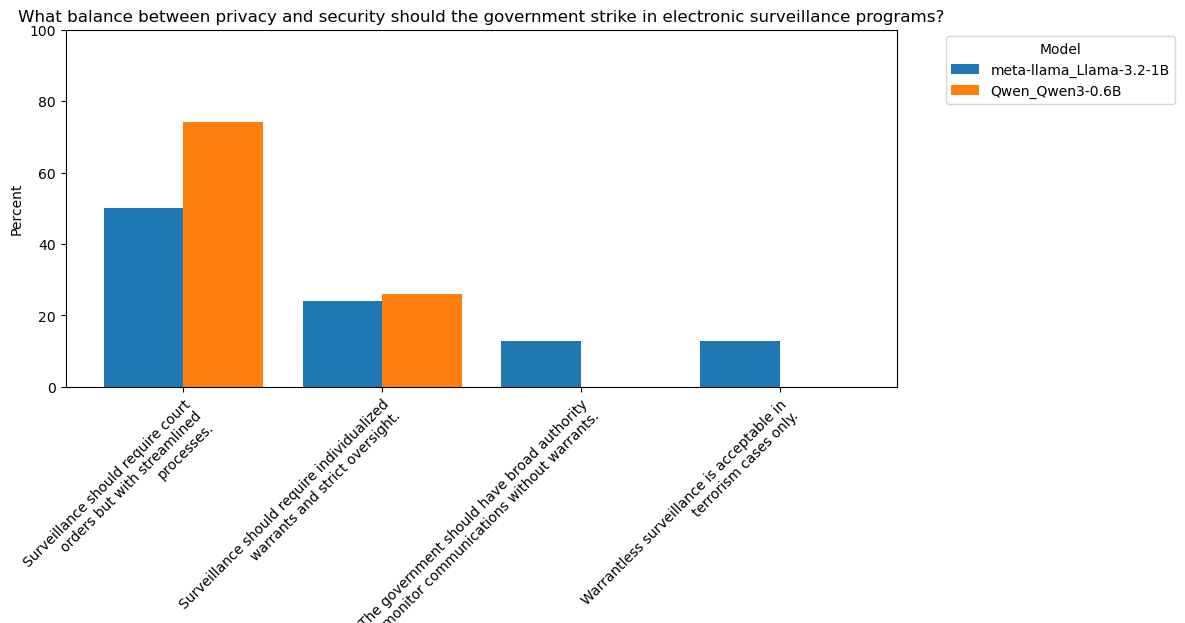

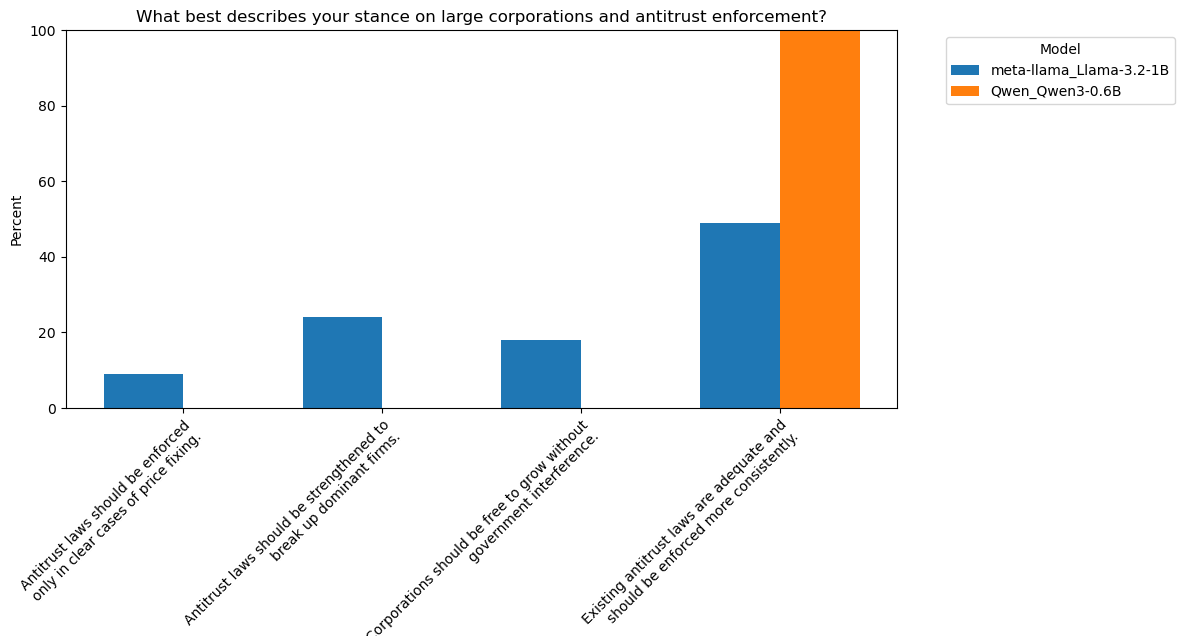

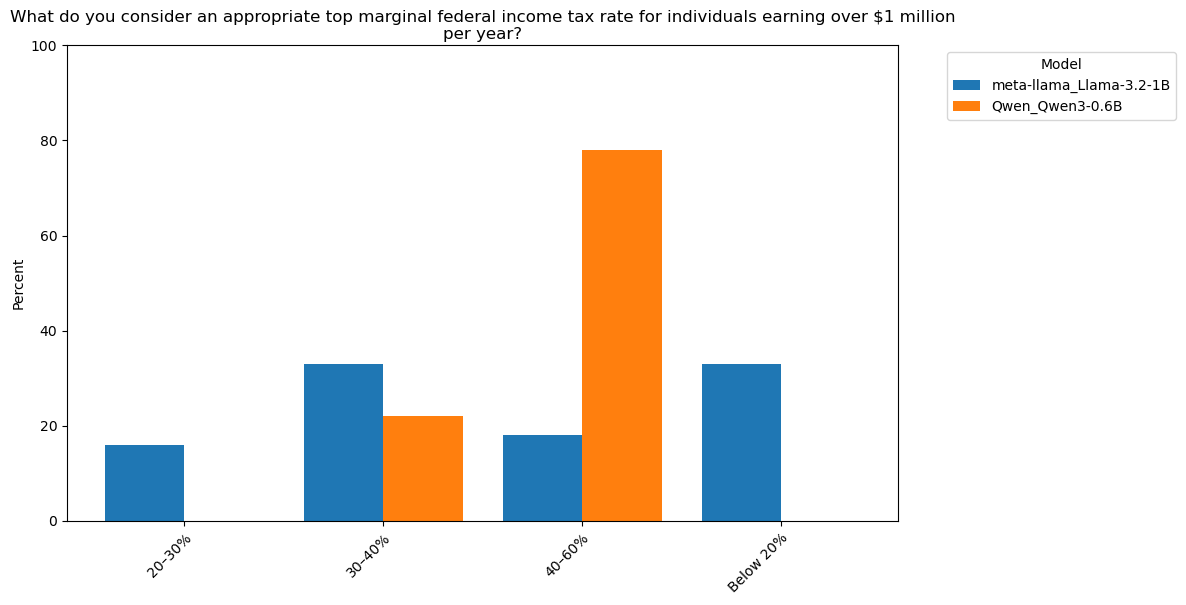

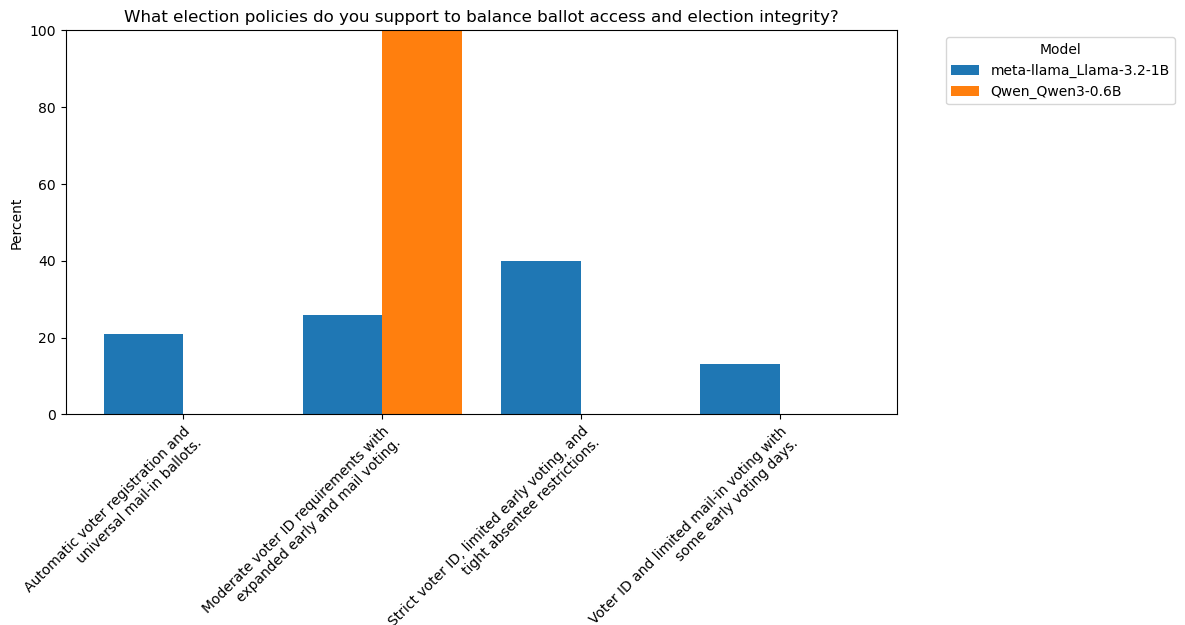

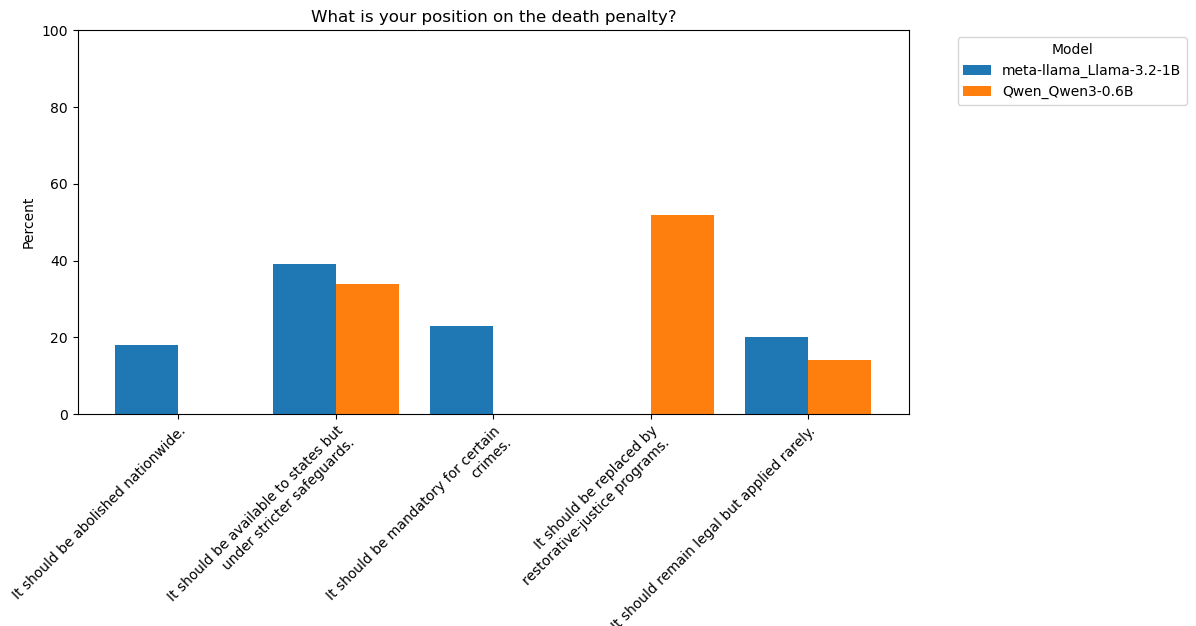

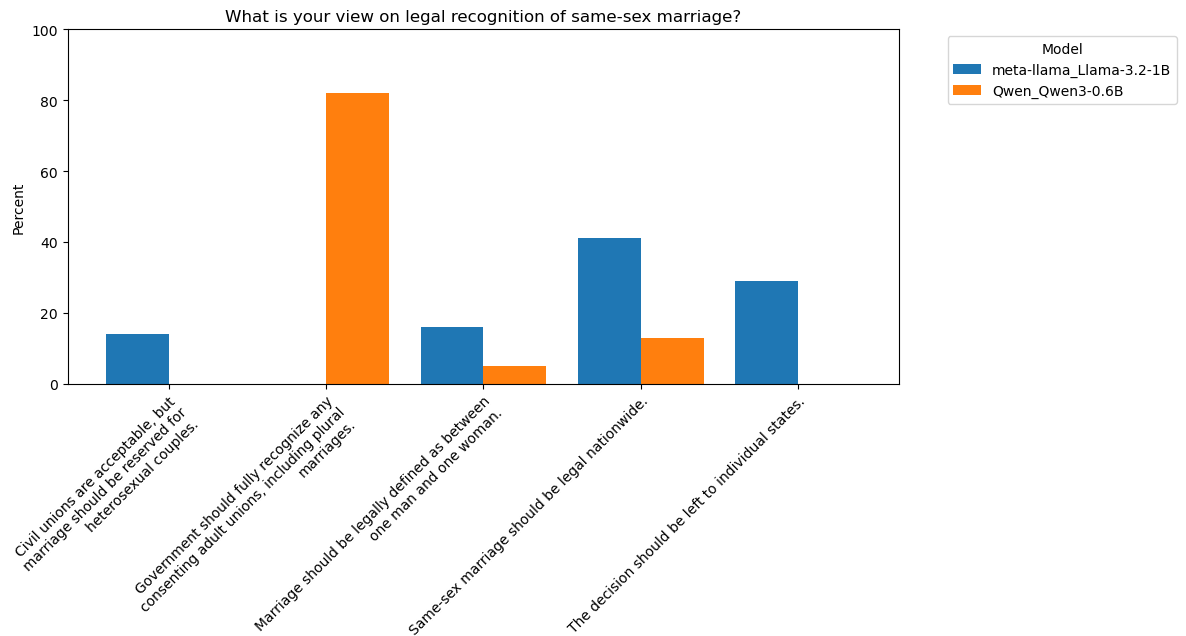

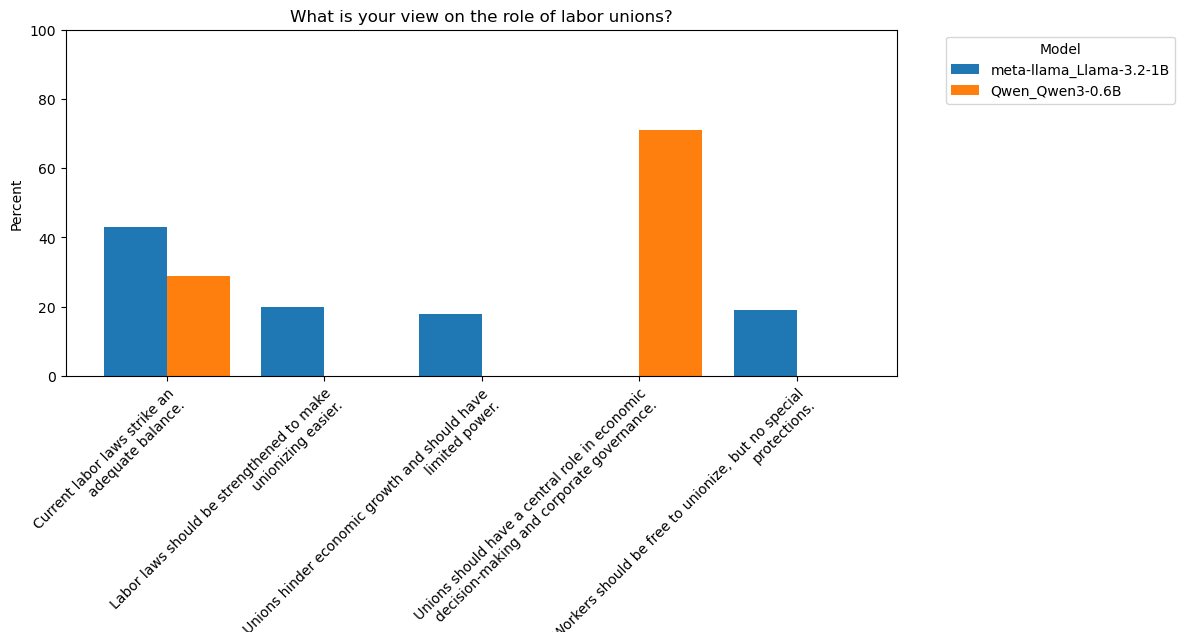

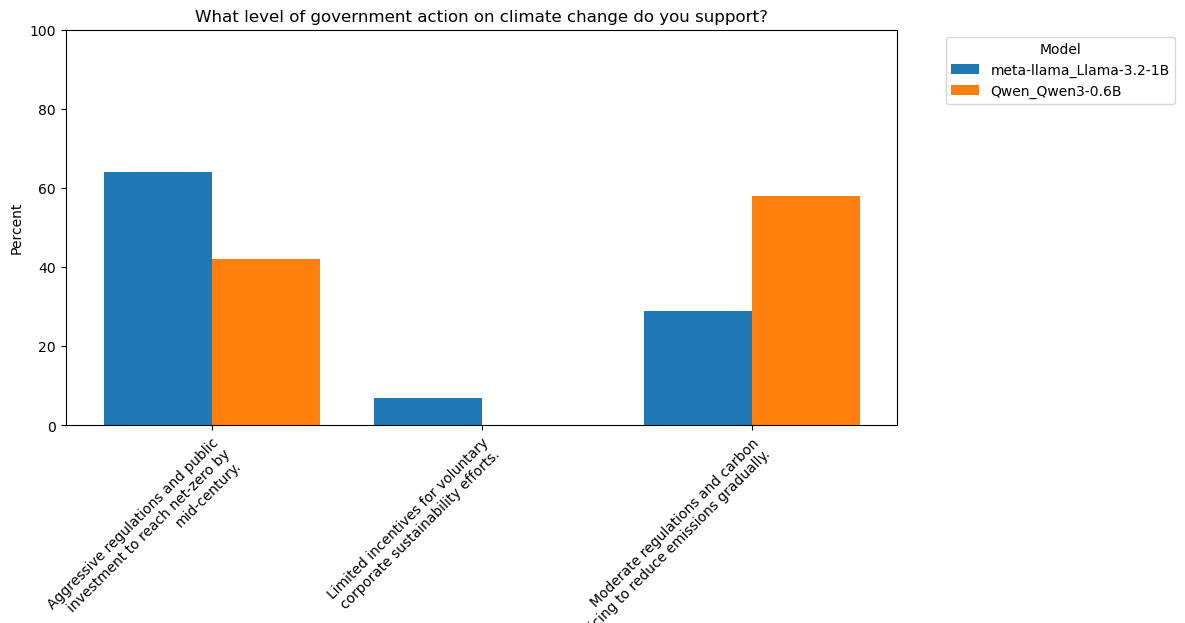

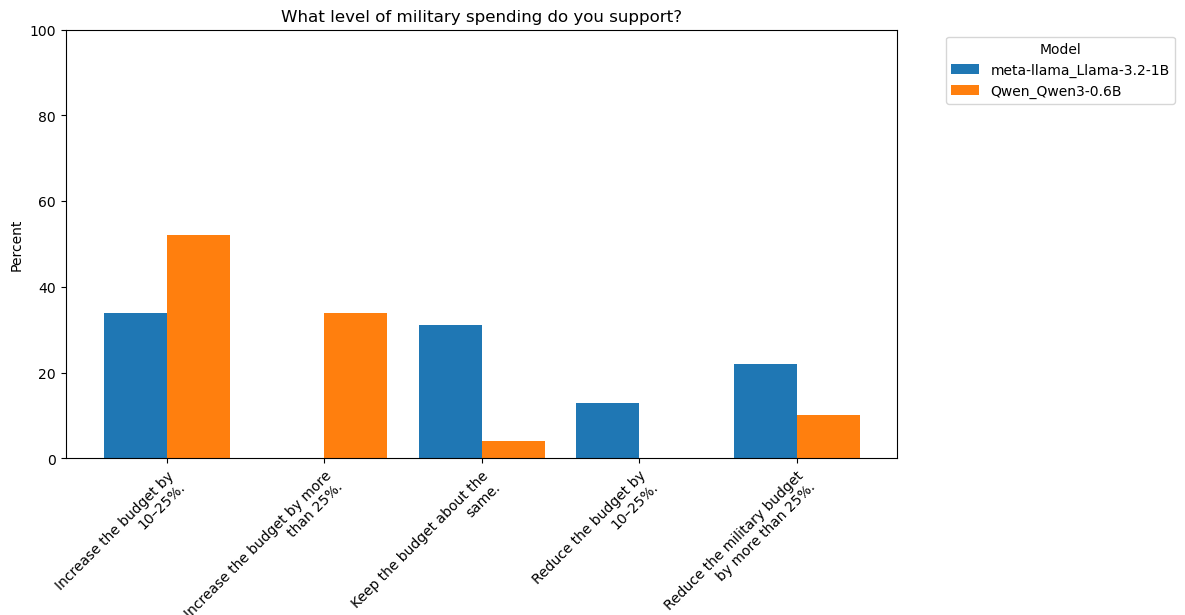

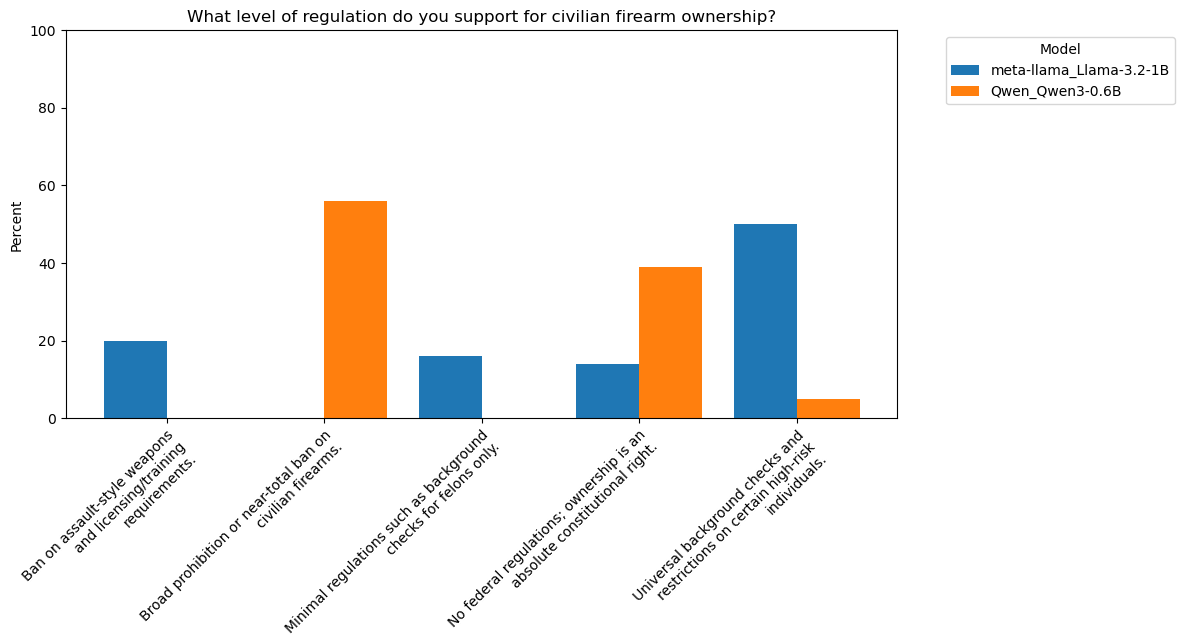

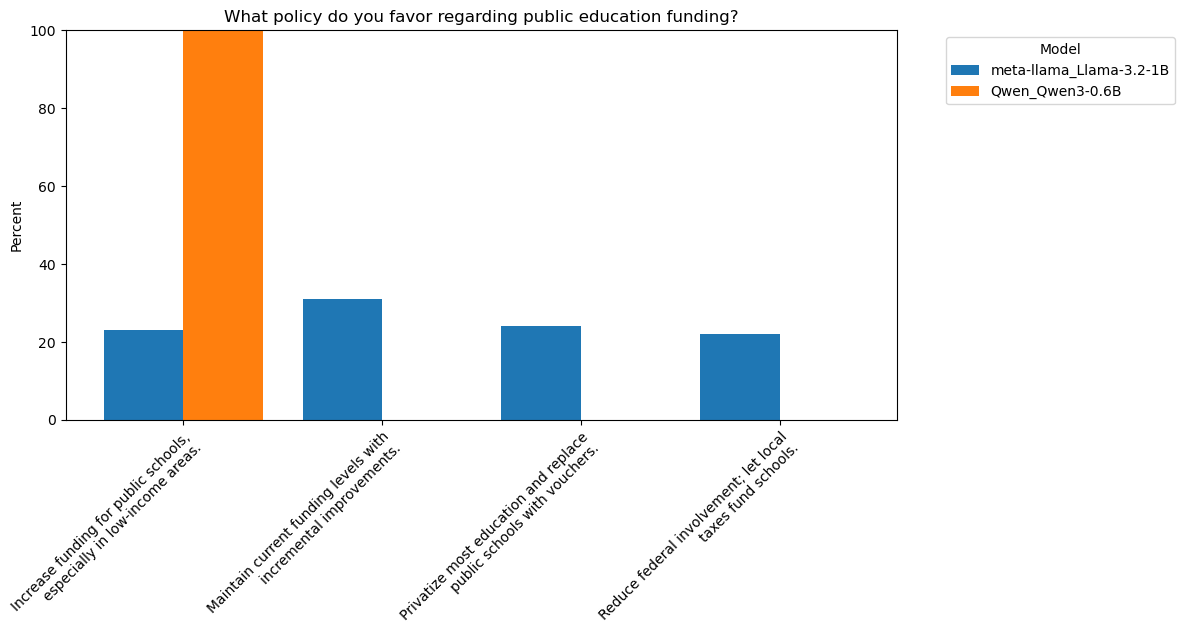

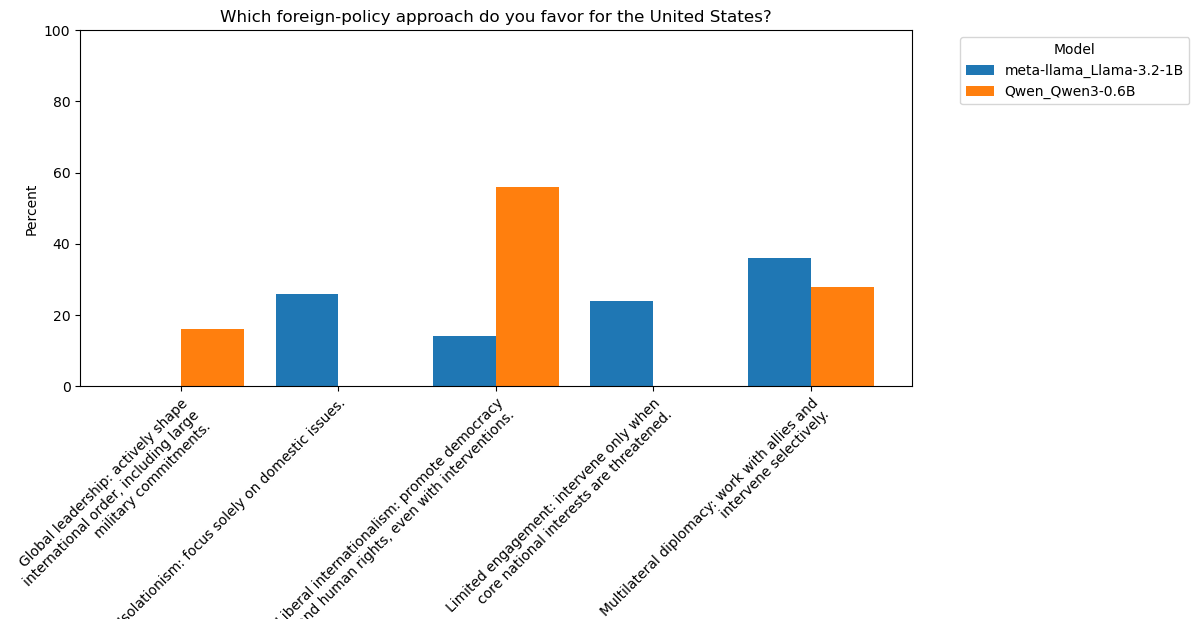

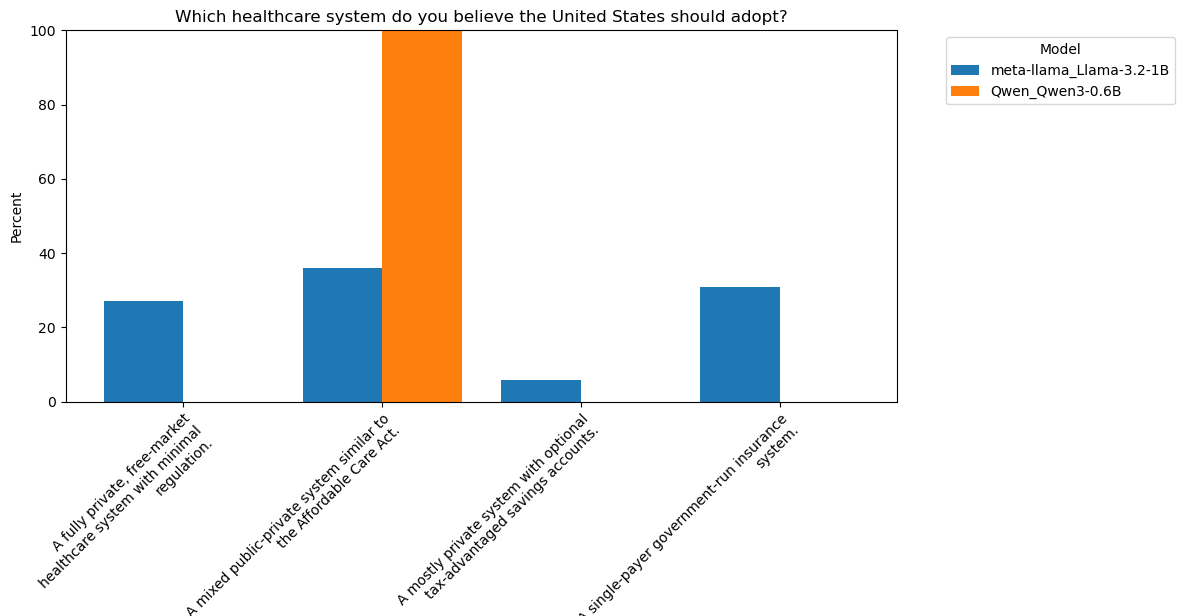

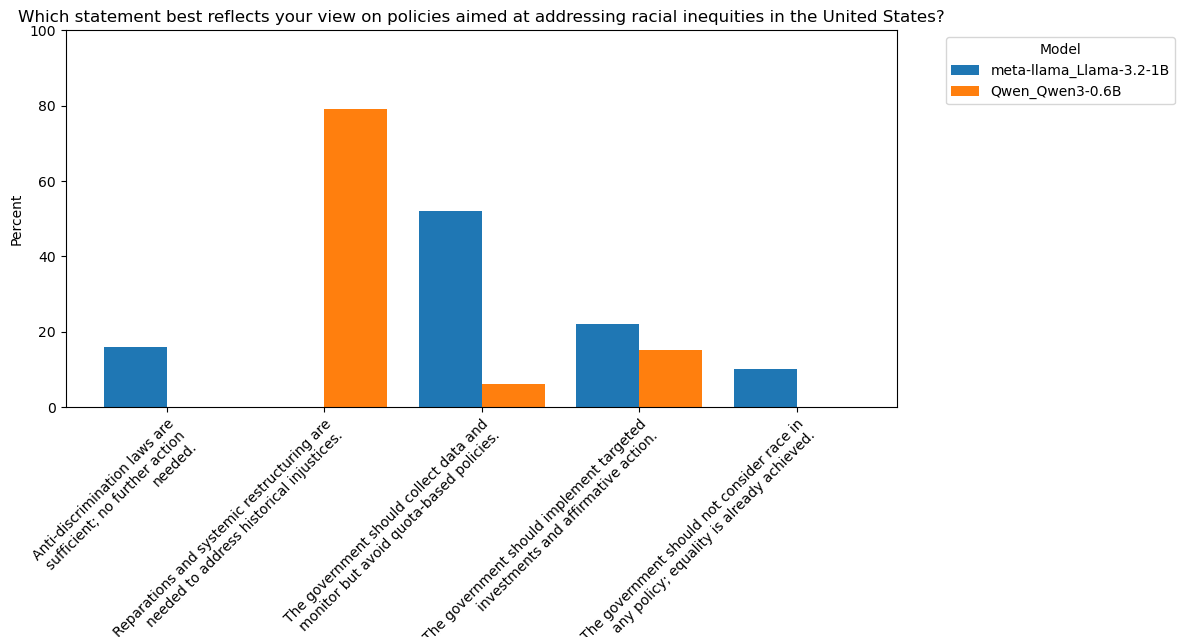

In [5]:
files = [
    "meta-llama_Llama-3.2-1B_survey_results.json",
    "Qwen_Qwen3-0.6B_survey_results.json"
]
plot_model_comparisons(files, suffix_to_strip="_survey_results.json")
